In [ ]:
!pip install pandas
!pip install sklearn
!pip install matplotlib
!pip install onnx
!pip install skl2onnx

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resol

In [28]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [91]:
!pip install joblib

In [29]:
import category_encoders as ce

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
training_data_path='/content/drive/MyDrive/Hackathons/LPU Hackathon/FSPS Training DS.csv'
testing_data_path='/content/drive/MyDrive/Hackathons/LPU Hackathon/FSPS Testing DS.csv'

training_data = pd.read_csv(training_data_path)
testing_data = pd.read_csv(testing_data_path)

In [47]:
# Display first few rows of the training dataset
print("Training Dataset:")
print(training_data.head())

# Display information about the training dataset
print("\nTraining Dataset Information:")
print(training_data.info())

# Display first few rows of the testing dataset
print("\nTesting Dataset:")
print(testing_data.head())

# Display information about the testing dataset
print("\nTesting Dataset Information:")
print(testing_data.info())


Training Dataset:
  Food Item  Temp. (in degree C)  Time period (in days)
0     Apple                 -1.1                    180
1     Apple                 -0.8                    181
2     Apple                 -0.5                    182
3     Apple                 -0.3                    183
4     Apple                 -0.2                    184

Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Food Item              260 non-null    object 
 1   Temp. (in degree C)    260 non-null    float64
 2   Time period (in days)  260 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 6.2+ KB
None

Testing Dataset:
  Food Item  Temp  Days
0     Apple  -0.3   183
1   Apricot   0.0    10
2   Avocado   8.0    26
3      Bael  10.0    22
4    Banana  13.5    20

Testing Dataset Infor

In [48]:
# Remove any rows with missing values
training_data.dropna(inplace=True)
testing_data.dropna(inplace=True)

# Check if there are any missing values after preprocessing
print("Training Dataset Missing Values:")
print(training_data.isnull().sum())

print("\nTesting Dataset Missing Values:")
print(testing_data.isnull().sum())

Training Dataset Missing Values:
Food Item                0
Temp. (in degree C)      0
Time period (in days)    0
dtype: int64

Testing Dataset Missing Values:
Food Item    0
Temp         0
Days         0
dtype: int64


In [49]:
encoder = ce.OneHotEncoder(cols=['Food Item'])

In [50]:
training_data = encoder.fit_transform(training_data)
testing_data = encoder.transform(testing_data)

In [51]:
# Extract features (X) and target variable (y) from the training dataset
X_train = training_data.drop(columns=['Time period (in days)'])
y_train = training_data['Time period (in days)']

X_test = testing_data.drop(columns=['Days'])
y_test = testing_data['Days']

In [58]:
print("Training data features:", training_data.columns.tolist())
print("Testing data features:", testing_data.columns.tolist())

Training data features: ['Food Item_1', 'Food Item_2', 'Food Item_3', 'Food Item_4', 'Food Item_5', 'Food Item_6', 'Food Item_7', 'Food Item_8', 'Food Item_9', 'Food Item_10', 'Food Item_11', 'Food Item_12', 'Food Item_13', 'Food Item_14', 'Food Item_15', 'Food Item_16', 'Food Item_17', 'Food Item_18', 'Food Item_19', 'Food Item_20', 'Food Item_21', 'Food Item_22', 'Food Item_23', 'Food Item_24', 'Food Item_25', 'Food Item_26', 'Food Item_27', 'Food Item_28', 'Food Item_29', 'Food Item_30', 'Food Item_31', 'Food Item_32', 'Food Item_33', 'Food Item_34', 'Food Item_35', 'Food Item_36', 'Food Item_37', 'Food Item_38', 'Food Item_39', 'Food Item_40', 'Food Item_41', 'Food Item_42', 'Food Item_43', 'Food Item_44', 'Food Item_45', 'Food Item_46', 'Food Item_47', 'Food Item_48', 'Food Item_49', 'Food Item_50', 'Food Item_51', 'Food Item_52', 'Temp. (in degree C)']
Testing data features: ['Food Item_1', 'Food Item_2', 'Food Item_3', 'Food Item_4', 'Food Item_5', 'Food Item_6', 'Food Item_7', 

In [56]:
training_data.drop(columns=["Time period (in days)"], inplace=True)
testing_data.drop(columns=["Days"], inplace=True)

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
X_test = X_test.rename(columns={'Temp': 'Temp. (in degree C)'})
y_test = y_test.rename({'Days': 'Time period (in days)'})

In [61]:
predictions = model.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error (MSE):', mse)

# Calculate R-squared value
r2 = r2_score(y_test, predictions)
print('R-squared value:', r2)

Mean Squared Error (MSE): 2.631163959214661
R-squared value: 0.9988256671059623


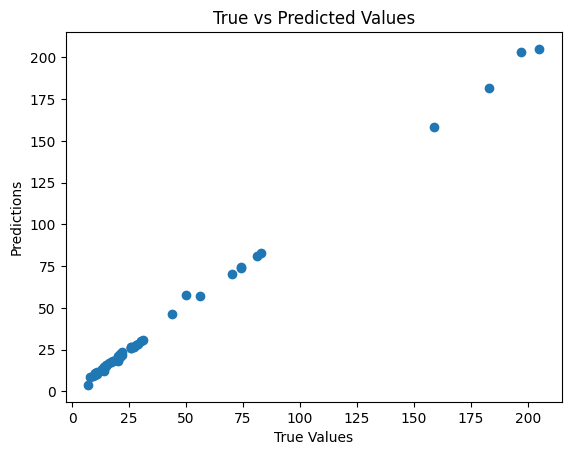

In [84]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [90]:
# Calculate the model's accuracy on the test data
model_accuracy = model.score(X_test, y_test)

# Print the model's accuracy
print("Model accuracy on test data: {}%".format(model_accuracy*100))


Model accuracy on test data: 99.88256671059624%


In [89]:
from sklearn.metrics import r2_score

score = r2_score(y_test, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) * 100))

The accuracy of our model is 100.0%


In [92]:
import joblib

# Define the file path where you want to save the model
model_file_path = '/content/drive/MyDrive/Hackathons/LPU Hackathon/fsp_lrm.pkl'

# Export the trained model to the specified file path
joblib.dump(model, model_file_path)

# Print a message to confirm that the model has been saved
print("Model saved successfully to:", model_file_path)

Model saved successfully to: /content/drive/MyDrive/Hackathons/LPU Hackathon/fsp_lrm.pkl
